In [32]:
import os
# Building deep learning models
import tensorflow as tf
from tensorflow import keras
# For accessing pre-trained models
import tensorflow_hub as hub
# For separating train and test sets
from sklearn.model_selection import train_test_split
# For Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

In [33]:
import os

# List the contents of the dataset folder
dataset_path = 'anemia detection.v1i.folder'
print(os.listdir(dataset_path))


['README.dataset.txt', 'README.roboflow.txt', 'test', 'train', 'valid']


In [34]:
import os

# Define the base path for the dataset
dataset_path = 'anemia detection.v1i.folder'

# Check training data
print("Train:", os.listdir(os.path.join(dataset_path, 'train')))

# Check validation data
print("Valid:", os.listdir(os.path.join(dataset_path, 'valid')))

# Check testing data
print("Test:", os.listdir(os.path.join(dataset_path, 'test')))



Train: ['anemia', 'normal']
Valid: ['anemia', 'normal']
Test: ['anemia', 'normal']


In [35]:
# Verify dataset folder structure
for folder in ['train', 'valid', 'test']:
    folder_path = os.path.join(dataset_path, folder)
    if os.path.exists(folder_path):
        print(f"{folder.capitalize()} folder exists. Contents: {os.listdir(folder_path)}")
    else:
        print(f"{folder.capitalize()} folder is missing.")


Train folder exists. Contents: ['anemia', 'normal']
Valid folder exists. Contents: ['anemia', 'normal']
Test folder exists. Contents: ['anemia', 'normal']


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load data
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    os.path.join(dataset_path, 'valid'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 204 images belonging to 2 classes.
Found 41 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


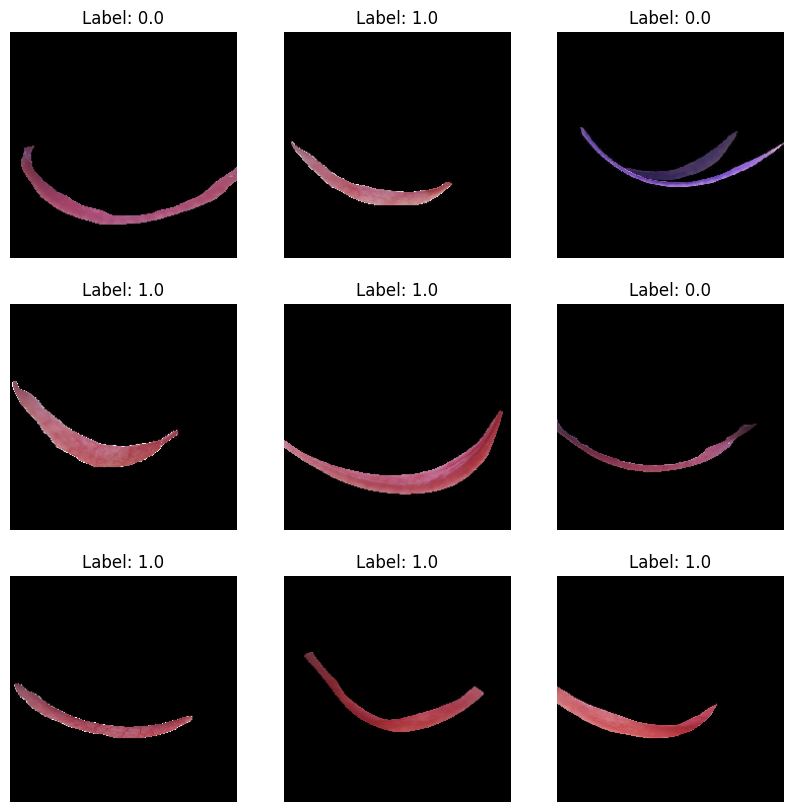

In [37]:
import matplotlib.pyplot as plt

# Visualize a batch of training data
images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10
)


c:\Users\moham.MSI-KATANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\moham.MSI-KATANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5574 - loss: 0.7599 - val_accuracy: 0.7317 - val_loss: 0.5153
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 814ms/step - accuracy: 0.7934 - loss: 0.4676 - val_accuracy: 0.8293 - val_loss: 0.3848
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 774ms/step - accuracy: 0.9186 - loss: 0.2822 - val_accuracy: 0.8537 - val_loss: 0.3790
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 922ms/step - accuracy: 0.9009 - loss: 0.2298 - val_accuracy: 0.8293 - val_loss: 0.3938
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 981ms/step - accuracy: 0.9461 - loss: 0.1378 - val_accuracy: 0.7805 - val_loss: 0.4247
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9705 - loss: 0.1035 - val_accuracy: 0.8537 - val_loss: 0.4859
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9777 - loss: 0.0549 - val_accuracy: 0.8293 - val_loss: 0.6099
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 944ms/step - accuracy: 1.0000 - loss: 0.0341 - val_accuracy: 0.8049 - val_loss: 0.6552


In [39]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.8148 - loss: 0.8898
Test Accuracy: 0.81


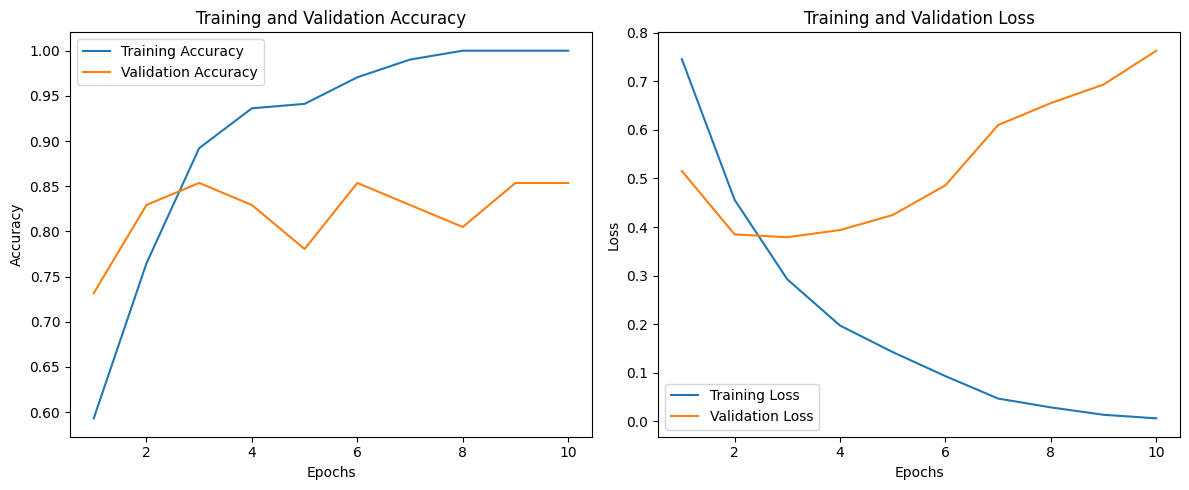

In [40]:
import matplotlib.pyplot as plt

# Extract data from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [41]:
from tensorflow.keras.models import load_model

# Save the trained model
model.save('anemia_detection_model.h5')

# Load the model
model = load_model('anemia_detection_model.h5')


In [42]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Specify the image path
test_image_path = './anemia detection.v1i.folder/valid/anemia/20_anemia_india_png_jpg.rf.0c3a8d1a7888161c531ce1898941cdf7.jpg'  # Update with your image path

# Load and preprocess the image
IMG_SIZE = (224, 224)  # Match the input size used during training
image = load_img(test_image_path, target_size=IMG_SIZE)
image_array = img_to_array(image) / 255.0  # Normalize pixel values
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension


In [43]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess a test image
test_image_path = './anemia detection.v1i.folder/test/anemia/2_anemia_italia_png_jpg.rf.9e6536516ae4fbb8e25b40f6ca849871.jpg'  # Update the path
image = load_img(test_image_path, target_size=(224, 224))
image_array = img_to_array(image) / 255.0  # Normalize
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

# Predict the class
prediction = model.predict(image_array)

# Map prediction to class
predicted_class = 'anemia' if prediction[0][0] > 0.5 else 'normal'

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Class: normal


In [44]:
# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    './anemia detection.v1i.folder/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")



Found 27 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step - accuracy: 0.8148 - loss: 0.8898
Test Loss: 0.8897528648376465
Test Accuracy: 0.8148148059844971


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


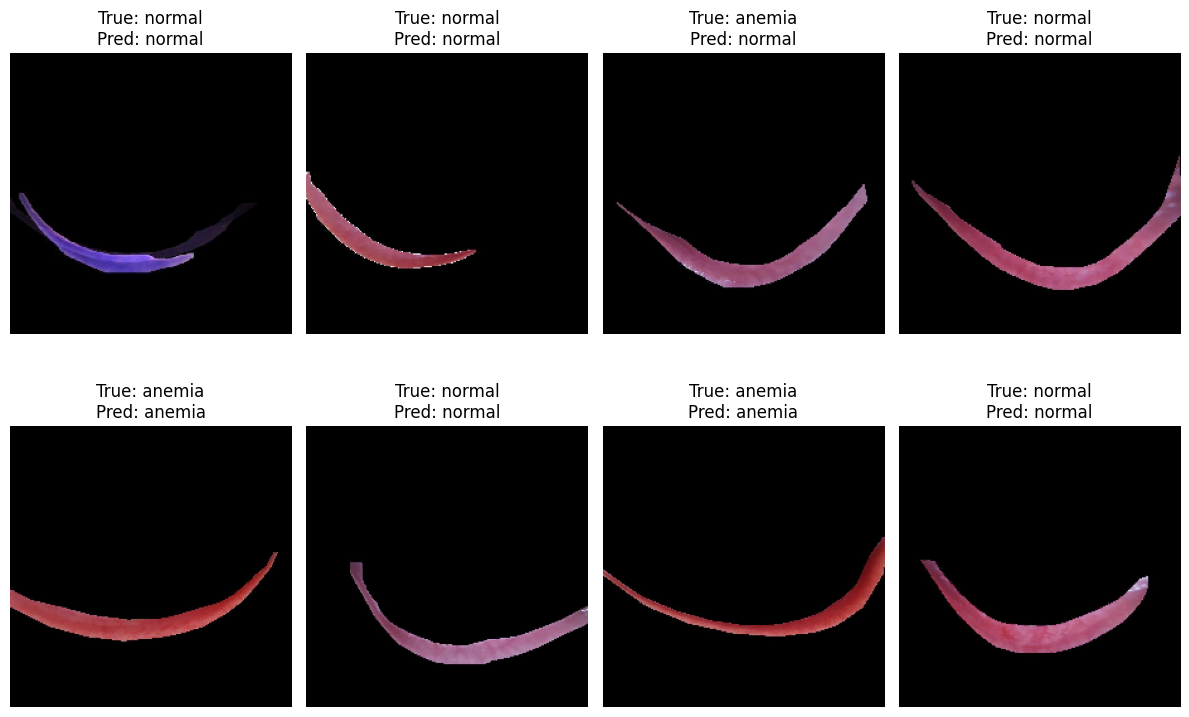

In [45]:
import matplotlib.pyplot as plt

# Display a batch of images with predictions
batch_images, batch_labels = next(test_generator)
predictions = model.predict(batch_images)

# Plot images with predictions
plt.figure(figsize=(12, 8))
for i in range(8):  # Display first 8 images
    plt.subplot(2, 4, i+1)
    plt.imshow(batch_images[i])
    true_label = 'anemia' if batch_labels[i] == 1 else 'normal'
    predicted_label = 'anemia' if predictions[i][0] > 0.5 else 'normal'
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()



In [47]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import streamlit as st
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [48]:
# Load pre-trained model
MODEL_PATH = 'anemia_detection_model.h5'
model = load_model(MODEL_PATH)

In [49]:
# Define constants
IMG_SIZE = (224, 224)
CLASS_NAMES = {0: 'normal', 1: 'anemia'}

# Streamlit app
st.title("Anemia Detection using Deep Learning")

# File uploader
uploaded_file = st.file_uploader("Upload an image of a blood sample", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Load and preprocess image
    image = load_img(uploaded_file, target_size=IMG_SIZE)
    image_array = img_to_array(image) / 255.0  # Normalize
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    # Display the uploaded image
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Make prediction
    prediction = model.predict(image_array)
    predicted_class = CLASS_NAMES[1] if prediction[0][0] > 0.5 else CLASS_NAMES[0]

    # Display prediction result
    st.write(f"### Predicted Class: {predicted_class}")

    # Confidence score
    confidence = prediction[0][0] if predicted_class == 'anemia' else 1 - prediction[0][0]
    st.write(f"Confidence Score: {confidence:.2f}")

# Add footer
st.write("---")
st.write("Developed for Anemia Detection using Deep Learning.")

2024-12-24 13:00:43.027 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 13:00:44.190 
  command:

    streamlit run C:\Users\moham.MSI-KATANA\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-24 13:00:44.193 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 13:00:44.194 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 13:00:44.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 13:00:44.197 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 13:00:44.202 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 13:00: